### __Group Assignment - Predicting Airbnb Listing Prices in Melbourne, Australia__

--- 

**Kaggle Competition Ends:** Friday, 6 June 2025 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 6 June 2025 @ 11.55pm (Week 13)   
**Total Marks:** 30

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models

**Instructions:** 

- Form a team of 3 students 
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/fc5974a56165cea945ee1ec182b079af](https://www.kaggle.com/t/fc5974a56165cea945ee1ec182b079af)
    - Team leader to click on `team` and invite other 2 team members to join
    - Your **team's name must start** with our unit code
- All team members should work on all the tasks however   
    - Each team member will be responsible for one of the 3 tasks listed below    
- **Your predictions must be generated by a model you develop here** 
    - You will receive a mark of **zero** if your code is not able produce the forecasts you submit to Kaggle 

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 1,500 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 1,500 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



**Marks** 

- Assignment: 30 marks consisting of Solutions (27 marks) + Video Presentation (3 marks)
- **Each Student's Mark: 50% x overall assignment mark + 50% x mark for the task that you are responsible for**  



**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
2. On iLearn **only team leader to submit** the assignment Jupyter notebook re-named to your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and the group name Kaggle
    - One 15 minute video recording of your work 
        - 5 marks will be deducted from each Task for which there is no video presentation   


---
---

### <span style="background-color: yellow;">**Fill out the following information**

- Team Name on Kaggle: `(insert here)`
- Team Leader and Team Member 1: `(insert here)`
- Team Member 2: `(insert here)`
- Team Member 3: `(insert here)`

---

## Task 1: Problem Description and Initial Data Analysis

- You must clearly explain all your answers in both the Markdown file and the recorded video.

**Total Marks: 9**   

Based on the Competition Overview, datasets and additional information provided on Kaggle, along with insights gained from personal research of the topic, write **Problem Description** (about 500 words) focusing on the sections listed below: 
1. Forecasting Problem - explain what we are trying to do and how it could be used in the real world, e.g. who and how may benefit from it (2 marks)    
2. Evaluation Criteria - discuss the criterion that is used in this competition to assess forecasting performance, and its pros and cons. (2 marks)     
3. Categorise all variables provided in the dataset according to their type; Hint: similar to what we had in Programming Task 1 (2 marks)  
4. Missing Values - explain what you find for both the training and test datasets at this stage (2 marks)
5. Provide and discuss some interesting *univariate* data characteristics (e.g. summary statistics and plots) in the training dataset  (1 marks)       
- Hints:
    - You should **not** discuss any specific predictive algorithms at this stage


Student in charge of this task: `(insert name here)`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            7000 non-null   int64  
 1   source                                        7000 non-null   object 
 2   name                                          6999 non-null   object 
 3   description                                   6943 non-null   object 
 4   neighborhood_overview                         5177 non-null   object 
 5   host_name                                     7000 non-null   object 
 6   host_since                                    7000 non-null   object 
 7   host_location                                 5720 non-null   object 
 8   host_about                                    4730 non-null   object 
 9   host_response_time                            7000 non-null   o

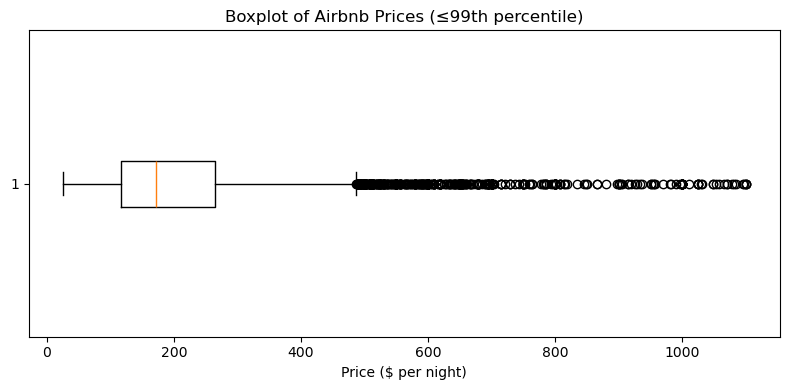

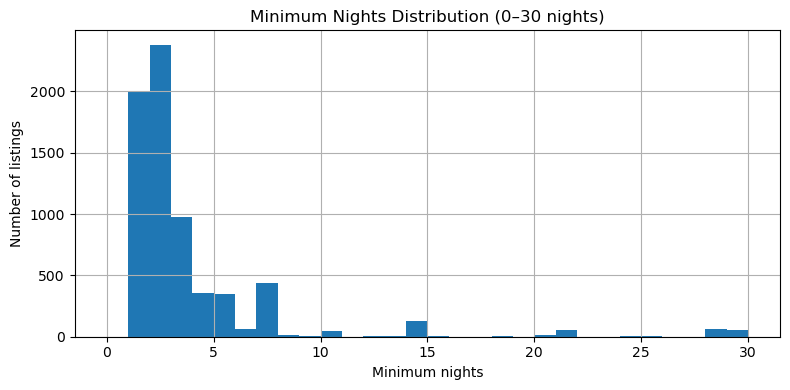

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
meta  = pd.read_csv("metaData.csv")

train.info()

for col in train.columns:
    print(col)

import matplotlib.pyplot as plt


# 5 Price box plot 
train["price"] = train["price"].str.replace(r'[\$,]', '', regex=True).astype(float)
p99 = train["price"].quantile(0.99)
plt.figure(figsize=(8,4))
plt.boxplot(train.loc[train["price"]<=p99, "price"], vert=False)
plt.title("Boxplot of Airbnb Prices (≤99th percentile)")
plt.xlabel("Price ($ per night)")
plt.tight_layout()
plt.show()





# histogram for minimum_nights (0 to 30 nights)
plt.figure(figsize=(8, 4))
train["minimum_nights"].hist(bins=30, range=(0, 30))
plt.title("Minimum Nights Distribution (0–30 nights)")
plt.xlabel("Minimum nights")
plt.ylabel("Number of listings")
plt.tight_layout()
plt.show()



`(Task 1, Text Here - insert more cells as required)`

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering

- You must clearly explain all your answers in both the Markdown file and the recorded video. 

**Total Marks: 9**

Student in charge of this task: `(insert name here)`

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [3]:

for df in (train, test):
    
    df['host_response_rate'] = ( df['host_response_rate'].str.rstrip('%').astype(float).div(100)
    )
   
    df['host_acceptance_rate'] = ( df['host_acceptance_rate'] .str.rstrip('%').astype(float).div(100))


print(train[['host_response_rate','host_acceptance_rate']].dtypes)
print(test[['host_response_rate','host_acceptance_rate']].dtypes)

host_response_rate      float64
host_acceptance_rate    float64
dtype: object
host_response_rate      float64
host_acceptance_rate    float64
dtype: object


`(Task 2, Question 1 Text Here - insert more cells as required)`

**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information.   
(2 marks)

In [5]:
for df in (train, test):

    # count amountof amenities each listing

    df['amenities_count'] = df['amenities'].str.count(',') + 1

    # Countshost verification ttypes
    
    
    
    df['host_verifications_count'] = df['host_verifications'].str.count(',') + 1

    # days since host joined)
    df['host_since'] = pd.to_datetime(df['host_since'])
    df['days_since_host_joined'] = (pd.Timestamp.today() - df['host_since']).dt.days

  # days since fgrst review
    df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
    df['days_since_first_review'] = (pd.Timestamp.today() - df['first_review']).dt.days


train[ ['amenities_count', 'host_verifications_count',
     'days_since_host_joined', 'days_since_first_review']].head()

,amenities_count,host_verifications_count,days_since_host_joined,days_since_first_review
0,38,2,4453,4440
1,57,2,5730,4516
2,21,2,4927,3611
3,13,2,5460,4970
4,49,3,5431,5296


`(Task 2, Question 2 Text Here - insert more cells as required)`

**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(2 marks)

In [7]:



#  Nnnumeric impuation with median
numeric_cols = train.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    med = train[col].median()
    train[col] = train[col].fillna(med)
    if col in test.columns:
        test[col]  = test[col].fillna(med)

# Text imputing with  empty string
text_cols = ['name','description','neighborhood_overview','host_about','host_location','amenities','host_verifications']
for col in text_cols:
    train[col] = train[col].fillna('')
    test[col]  = test[col].fillna('')

#  Date colomns
date_cols = ['host_since','first_review','last_review']
for col in date_cols:
    mode_val   = train[col].mode(dropna=True)[0]
    train[col] = train[col].fillna(mode_val)
    test[col]  = test[col].fillna(mode_val)

# ategorical excluding text colomns
cat_cols = [c for c in train.select_dtypes(include=['object']).columns
            if c not in text_cols + [ 'name','description','neighborhood_overview','host_about','host_location','amenities','host_verifications']]
for col in cat_cols:
    mode_val   = train[col].mode(dropna=True)[0]
    train[col] = train[col].fillna(mode_val)
    test[col]  = test[col].fillna(mode_val)

# checking if there are missing values
missing = pd.DataFrame({
    'train_missing': train.isnull().sum(),
    'test_missing':  test.isnull().sum()
})
print(missing[missing.sum(axis=1) > 0])
print(missing)

Empty DataFrame
Columns: [train_missing, test_missing]
Index: []
                      train_missing  test_missing
ID                                0           0.0
accommodates                      0           0.0
amenities                         0           0.0
amenities_count                   0           0.0
availability_30                   0           0.0
...                             ...           ...
review_scores_rating              0           0.0
review_scores_value               0           0.0
reviews_per_month                 0           0.0
room_type                         0           0.0
source                            0           0.0

[65 rows x 2 columns]


`(Task 2, Question 3 Text Here - insert more cells as required)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately.  
(2 marks)

In [17]:


#  convert date columns to datetime so it isnot object dtype
date_cols = ['host_since','first_review','last_review']
for df in (train, test):
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')

#  define text fields to exclude from categorical encoding
text_cols = [
    'name','description','neighborhood_overview',
    'host_about','host_location','amenities','host_verifications'
]

# Manually list the categoricals to be  encode
cat_manual = [
    'source','host_response_time','host_is_superhost','host_neighbourhood',
    'host_has_profile_pic','host_identity_verified',
    'neighbourhood','neighbourhood_cleansed',
    'property_type','room_type',
    'instant_bookable','has_availability'
]

# put those columns back to string object
for col in cat_manual:
    train[col] = train[col].astype(str)
    test[col]  = test[col].astype(str)

#  final list of categorical columns
cat_cols = [
    c for c in train.select_dtypes(include=['object']).columns
    if c not in text_cols + date_cols
]

print("Encoding categorical columns:", cat_cols)

#  make  multiple valued records and map to top 5 and otherr
for col in cat_cols:
    # mark multi-valued cells as 'other'
    train.loc[train[col].str.contains(',', na=False), col] = 'other'
    test.loc[test[col].str.contains(',',  na=False), col] = 'other'
    # find top 5 levels in train
    top5 = train[col].value_counts().nlargest(5).index
    # map everything else to 'other'
    train[col] = train[col].where(train[col].isin(top5), other='other')
    test[col]  = test[col].where(test[col].isin(top5),  other='other')

#  Onehot encode and align train and test
train_enc = pd.get_dummies(train, columns=cat_cols, prefix=cat_cols, drop_first=False)
test_enc  = pd.get_dummies(test,  columns=cat_cols, prefix=cat_cols, drop_first=False)
train_enc, test_enc = train_enc.align(test_enc, join='left', axis=1, fill_value=0)

#   new dummy columns display
dummy_cols = [c for c in train_enc.columns if any(c.startswith(orig + "_") for orig in cat_cols)]
print(train_enc[dummy_cols].head())


Encoding categorical columns: ['source', 'host_name', 'host_response_time', 'host_is_superhost', 'host_neighbourhood', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms', 'has_availability', 'instant_bookable']
   source_city scrape  source_previous scrape  host_name_James  \
0                True                   False            False   
1                True                   False            False   
2                True                   False            False   
3                True                   False            False   
4                True                   False            False   

   host_name_Paul & Dan  host_name_S&S  host_name_Valeria  host_name_other  \
0                 False          False              False             True   
1                 False          False              False             True   
2                 False          False              False             True

`(Task 2, Question 4 Text Here - insert more cells as required)`

**Task 2, Question 5**: Perform any additional data preparation steps you consider necessary before building your predictive models, and clearly explain each action you take.
(1 mark)

In [ ]:
## Task 2, Question 5 Code Here

`(Task 2, Question 5 Text Here - insert more cells as required)`

--- 
## Task 3: Fit and tune predictive models, submit predictions & win competition

- You must clearly explain all your answers in both the Markdown file and the recorded video.
- 
**Total Marks: 9**

For this task, you should not create any new features and must rely on the variables constructed in Task 2.  
 

1. Perform some EDA to measure the relationship between the features and the target variable, and carefully explain your findings. (2 marks)

2. Choose and carefully explain 3 different machine learning (ML) regression models that you will apply in this competition. (2 marks)
   
3. Train the models from the above question and tune their hyperparameters via cross-validation. Discuss the fitted weights, optimised hyperparameter values, and their training dataset predictive performance. (2 marks)   

4. Select your best model, create predictions of the test dataset and submit your forecasts on Kaggle's competition page. Provide Kaggle ranking and score (screenshots) and comment on your performance in the competition. (2 marks)

5. Suggest ways to improve your ranking and implement them, providing further evidence from Kaggle (screenshots). (1 mark)   

- Hints:
    - Make sure your Python code works so that your results can be replicated by the marker
    - You will receive the mark of zero for this Task if your code does not produce the forecasts uploaded to Kaggle



Student in charge of this task: `(insert name here)`

In [ ]:
#Task 3 code here

`(Task 3 - insert more cells as required)`

---
---
## Marking Criteria

To receive full marks your solutions must satisfy the following criteria:

- Problem Description: 9 marks
- Data Cleaning: 9 marks
- Building Forecasting models: 9 marks
- Video Presentation: 3 marks
    - Duration less than 15 min, presentation skill and content 
    - Each team member delivers a 5-minute presentation on their assigned task
    - All assignment questions must be discussed on video  
    - Your code must be readable on the video
    - Discuss both the actions you took and, more importantly, the reasoning behind these actions, explaining the significance of key steps
    - During the video recording, make sure that both your face and Jupyter Notebook are clearly visible
- Forecasts correctly uploaded to Kaggle
- Python code is clean and concise
- Written explanations are provided in clear and easy to understand sentences
- The assignment notebook is well-organised and easy to follow
- Failure to meet the above marking criteria will result in a deduction of marks

---
---